### Excercises studyletter 1

### Exercise 2.1 - Customer Segmentation k-means
Import the customers data

In [1]:
from pyper import *
import feather
import pandas as pd
%matplotlib inline
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
r = R()
r.has_pandas = True
r('library(ggplot2)')
r('library(data.table)')
r('library(feather)')
r('library(dplyr)')
r('library(tidyr)')

def r_to_py():
    r('path<-c(paste0("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/df.feather"))')
    r('write_feather(df, path)')
    path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/df.feather"
    df = feather.read_dataframe(path)

def py_to_r(df):
    path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/df.feather"
    feather.write_dataframe(df, path)
    r('path<-c("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/df.feather")')
    r('df<-read_feather(path)')
    


In [3]:
r('customers_df<-fread("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/customer.tsv")')

'try({customers_df<-fread("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/customer.tsv")})\r\n'

In [4]:
print(r('head(customers_df)'))
r.customers_df.columns

try({head(customers_df)})
   Customer ID ItemsBought ItemsReturned ZipCode Product
1:           4          45            10       2    1365
2:           5          42            18       5    2764
3:           6          50             0       1    1343
4:           8          13            12       4    2435
5:           9          10             7       3    2435
6:          10          34            17       6    2896



Index([' Customer ID ', ' ItemsBought ', ' ItemsReturned ', ' ZipCode ',
       ' Product '],
      dtype='object')

### Assign correct dtypes

In [5]:
customers_df=r.customers_df
customers_df.columns=customers_df.columns.str.strip()

In [6]:
customers_df['Customer ID']=customers_df['Customer ID'].astype('category')
customers_df['ZipCode']=customers_df['ZipCode'].astype('category')
customers_df['Product']=customers_df['Product'].astype('category')
customers_df.dtypes

Customer ID      category
ItemsBought         int64
ItemsReturned       int64
ZipCode          category
Product          category
dtype: object

### K-means in R, plot solution to find good solution
Clustering is descriptive modeling, no need to create something deployable in Python (yet)

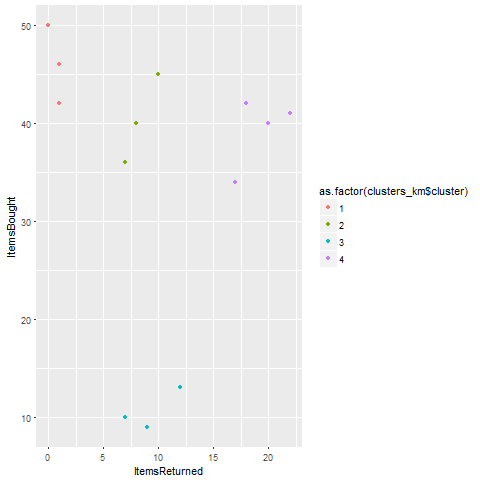

In [9]:
#path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 2 Clustering/"+str(df)+".feather"
py_to_r(customers_df)
r('set.seed(20)')
r('clusters_km<-kmeans(select(df, ItemsReturned, ItemsBought), 4)')
r('plot<-ggplot(df, aes(ItemsReturned, ItemsBought, color = as.factor(clusters_km$cluster)))+ geom_point()')
r("png('rplot.png'); print(plot); dev.off()")

# Upload the figure to Jupyter
from IPython.display import Image
Image("rplot.png",width=600,height=400)

### Find suitable labels

There are not a lot of data points, but one can distinguish customers who buy a lot and do not return anything (satisfied high volume customers, good customers), those who by infrequently and return almost everything (low volume bad customers), those who by frequently but also return at a moderate rate (ok customers), those who buy a lot but still return a lot (high volume bad customers). 

### Products bought by likely bad customers

In [10]:
r('df$clusters<-as.factor(clusters_km$cluster)')
r('products_bad<-filter(select(df, Product, clusters), clusters=="3")')
r.products_bad

,Product,clusters
0,b'2435',b'3'
1,b'2435',b'3'
2,b'2435',b'3'


Obviously they buy one specific product.

### Zip Codes bought by best customers


In [15]:
r('df$clusters<-as.factor(clusters_km$cluster)')
r('products_good<-filter(select(df, ZipCode, clusters), clusters=="1")')
r.products_good

,ZipCode,clusters
0,b'1',b'1'
1,b'1',b'1'
2,b'1',b'1'


They appear to come from the same area. 

### Use agglomerative clustering inspect dendogram
What does the hierachy tell about the customer groups?

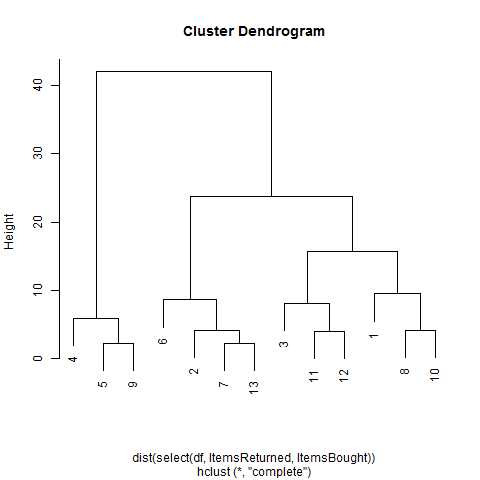

In [11]:
r("png('rplot.png'); print(plot(hclust(dist(select(df, ItemsReturned, ItemsBought))))); dev.off()")

Image("rplot.png",width=600,height=400)

This yields an impression consistent with beforehands results: Two main clusters, within the larger cluster of customers buying at some frequency there are three subclusters.


### Create four clusters using hierarchical clustering and think of labels

In [35]:
r('df$hclusters<-cutree(hclust(dist(select(df, ItemsReturned, ItemsBought), method = "euclidean")), k=4)')
r('df$hclusters<-factor(df$hclusters, levels=unique(df$clusters))')
r('df$hclusters<-factor(df$clusters, levels=unique(df$clusters))')
print(r('all(df$hclusters==df$clusters)'))

try({all(df$hclusters==df$clusters)})
[1] TRUE



The labels are the same in all cases, so the same interpretation as in k-means clustering applies.